In [63]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

***1st Answer***

-Considering the following 2-D datasets flame (flame.csv) and toy (toy.csv).

-Applying K-means, hierarchical clustering algorithms (use Sklearn) to segment the
above datasets into 2 clusters.

-Showing the scatterplot for the original clusters as
well as the clusters obtained by your implementation.


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, rand_score
from sklearn.decomposition import PCA

flame = pd.read_csv('flame.csv')
toy = pd.read_csv('toy.csv')
print(flame.columns)
flame.columns = ['c1', 'c2', 'o3']
print(flame.columns)
print('\n')
print(toy.columns)
toy.columns = ['c1', 'c2', 'o3']
print(toy.columns)

Index(['1.85', '27.8', '1'], dtype='object')
Index(['c1', 'c2', 'o3'], dtype='object')


Index(['0.85', '17.45', '2'], dtype='object')
Index(['c1', 'c2', 'o3'], dtype='object')


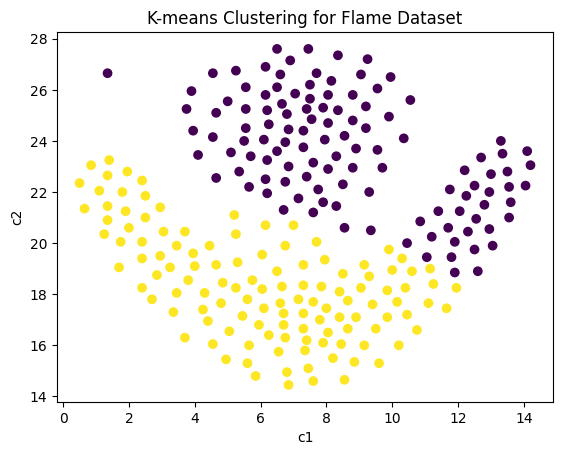

In [65]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(flame)

plt.scatter(flame['c1'], flame['c2'], c=kmeans.labels_)
plt.title('K-means Clustering for Flame Dataset')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

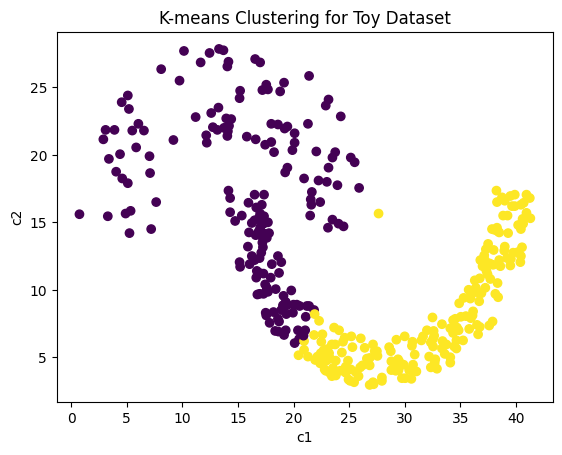

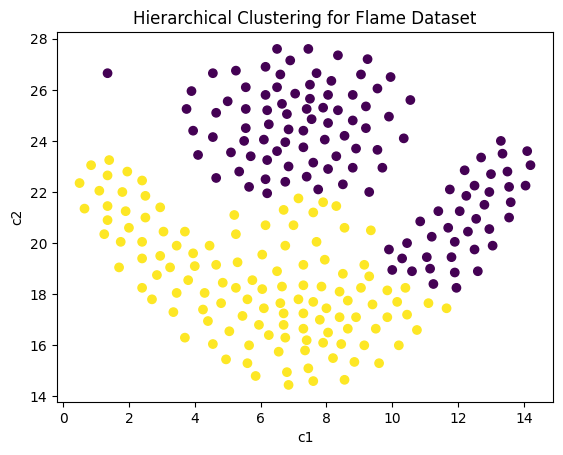

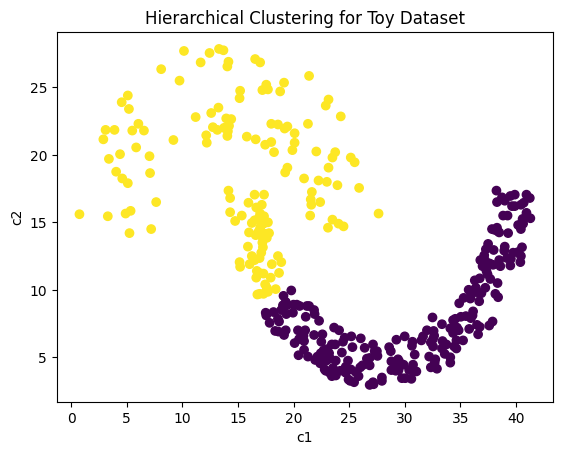

In [66]:
import matplotlib.pyplot as plt
# K-means clustering for Toy dataset
kmeans = KMeans(n_clusters=2)
kmeans.fit(toy)

plt.scatter(toy['c1'], toy['c2'], c=kmeans.labels_)
plt.title('K-means Clustering for Toy Dataset')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

# Hierarchical clustering for Flame dataset
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical.fit(flame)

plt.scatter(flame['c1'], flame['c2'], c=hierarchical.labels_)
plt.title('Hierarchical Clustering for Flame Dataset')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

# Hierarchical clustering for Toy dataset
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical.fit(toy)

plt.scatter(toy['c1'], toy['c2'], c=hierarchical.labels_)
plt.title('Hierarchical Clustering for Toy Dataset')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()


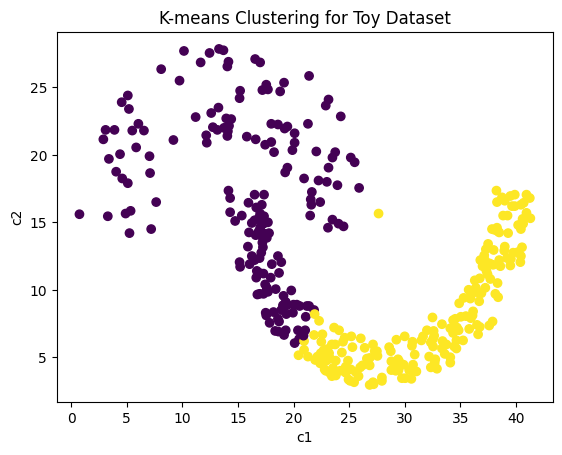

In [67]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(toy)

plt.scatter(toy['c1'], toy['c2'], c=kmeans.labels_)
plt.title('K-means Clustering for Toy Dataset')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

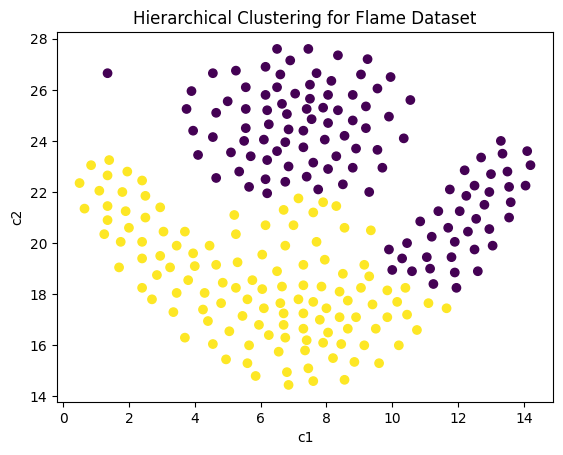

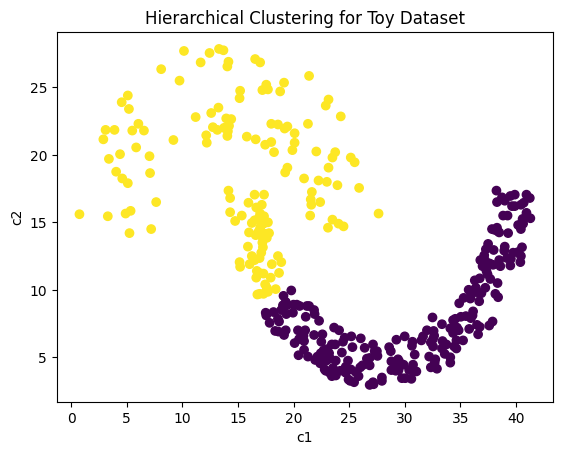

In [68]:
agg1 = AgglomerativeClustering(n_clusters=2)
agg1.fit(flame)

plt.scatter(flame['c1'], flame['c2'], c=agg1.labels_)
plt.title('Hierarchical Clustering for Flame Dataset')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

agg = AgglomerativeClustering(n_clusters=2)
agg.fit(toy)

plt.scatter(toy['c1'], toy['c2'], c=agg.labels_)
plt.title('Hierarchical Clustering for Toy Dataset')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

***2nd Answer***

-Identifying valid customer groups of a retailer shops / malls is an important
business problem.

-Finding attached a dataset (shop.csv) having customer
information such as gender, age, annual income and spending score. Based on
these information you need to identify a set of customer groups having similar
purchase patterns. The number of groups is unknown (use elbow method to find
optimal number clusters).

-Reporting the clustering performance metrics (Rand index, Silhouette
index). Use sklearn library for clustering as well as metrics.

-Extracting principal components form the dataset, and applying the algorithms
and re-evaluating the performance.

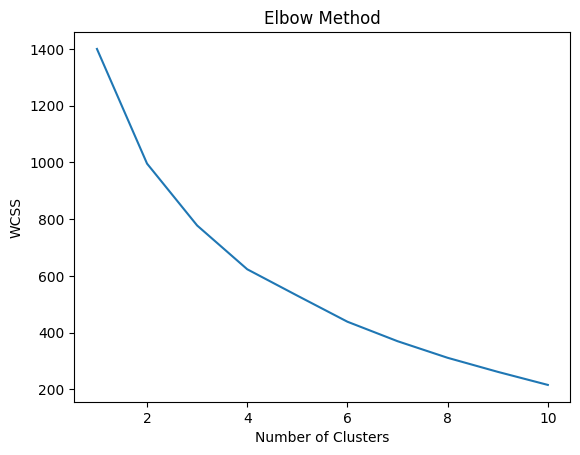

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0        131.409836  44.213115           74.147541               53.721311   
1        160.783784  35.945946           86.486486               47.513514   
2         71.653846  58.846154           48.692308               39.846154   
3         57.078431  30.784314           41.431373               48.901961   
4         54.440000  25.720000           40.400000               59.000000   

          cluster  Gender_Female  Gender_Male  
Cluster                                        
0        0.836066            1.0          0.0  
1        1.513514            0.0          1.0  
2        0.846154            0.0          1.0  
3        4.235294            1.0          0.0  
4        4.160000            0.0          1.0  


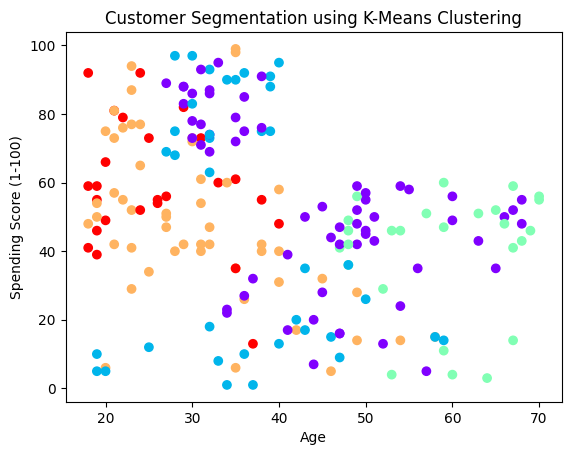

In [69]:

import pandas as pd
import matplotlib.pyplot as plt

shop = pd.read_csv('shop.csv')

shop.dropna(inplace=True)
shop = pd.get_dummies(shop, columns=['Gender'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
shop_scaled = scaler.fit_transform(shop)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(shop_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(shop_scaled)

shop['Cluster'] = kmeans.labels_

print(shop.groupby('Cluster').mean())
plt.scatter(shop['Age'], shop['Spending Score (1-100)'], c=shop['Cluster'], cmap='rainbow')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [70]:
# Calculating Rand index and Silhouette index for Hierarchical clustering
print('\nHierarchical Clustering Performance:')
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical.fit(shop_scaled)
print('Rand Index:', rand_score(shop['Cluster'], hierarchical.labels_))
print('Silhouette Index:', silhouette_score(shop_scaled, hierarchical.labels_))
print('\n')
print('K-means Clustering Performance:')
print('Rand Index:', rand_score(shop['Cluster'], kmeans.labels_))
print('Silhouette Index:', silhouette_score(shop_scaled, kmeans.labels_))

# Extracting principal components from the dataset
pca = PCA(n_components=2)
shop_pca = pca.fit_transform(shop_scaled)

# Applying K-means and Hierarchical clustering to the principal components
kmeans_pca = KMeans(n_clusters=5)
kmeans_pca.fit(shop_pca)
hierarchical_pca = AgglomerativeClustering(n_clusters=5)
hierarchical_pca.fit(shop_pca)

# Calculating Rand index and Silhouette index for Hierarchical clustering on principal components
print('\nHierarchical Clustering Performance on Principal Components:')
print('Rand Index:', rand_score(shop['Cluster'], hierarchical_pca.labels_))
print('Silhouette Index:', silhouette_score(shop_pca, hierarchical_pca.labels_))

# Calculating Rand index and Silhouette index for K-means clustering on principal components
print('\nK-means Clustering Performance on Principal Components:')
print('Rand Index:', rand_score(shop['Cluster'], kmeans_pca.labels_))
print('Silhouette Index:', silhouette_score(shop_pca, kmeans_pca.labels_))





Hierarchical Clustering Performance:
Rand Index: 0.9041708542713568
Silhouette Index: 0.3568894194746892


K-means Clustering Performance:
Rand Index: 1.0
Silhouette Index: 0.36738274595985443

Hierarchical Clustering Performance on Principal Components:
Rand Index: 0.8761306532663317
Silhouette Index: 0.5502121744354731

K-means Clustering Performance on Principal Components:
Rand Index: 0.8619597989949749
Silhouette Index: 0.5825086863568523
